# Tesla Stock Price Analysis using python

In [6]:
! pip install mysql-connector-python
# call the libraries like numpy,pandas,seaborn and matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 


In [7]:
import pandas as pd
import mysql.connector

# Establish a connection to the MySQL database
cnx = mysql.connector.connect(user='root', password='1234',database='stock_prices')

# Write a query to select the data from the table
query = 'SELECT * FROM tesla_stock_prices;'

# Use pandas to read the data into a dataframe
df = pd.read_sql(query, cnx)

# Close the database connection
cnx.close()

# Display the resulting dataframe
print(df.head())

         Date   Open   High    Low  Close  Adj_Close    Volume
0  2010-06-29  19.00  25.00  17.54  23.89      23.89  18766300
1  2010-06-30  25.79  30.42  23.30  23.83      23.83  17187100
2  2010-07-01  25.00  25.92  20.27  21.96      21.96   8218800
3  2010-07-02  23.00  23.10  18.71  19.20      19.20   5139800
4  2010-07-06  20.00  20.00  15.83  16.11      16.11   6866900


In [8]:
df.set_index('Date', inplace=True)

In [9]:
df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300
2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100
2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900


<AxesSubplot:xlabel='Date'>

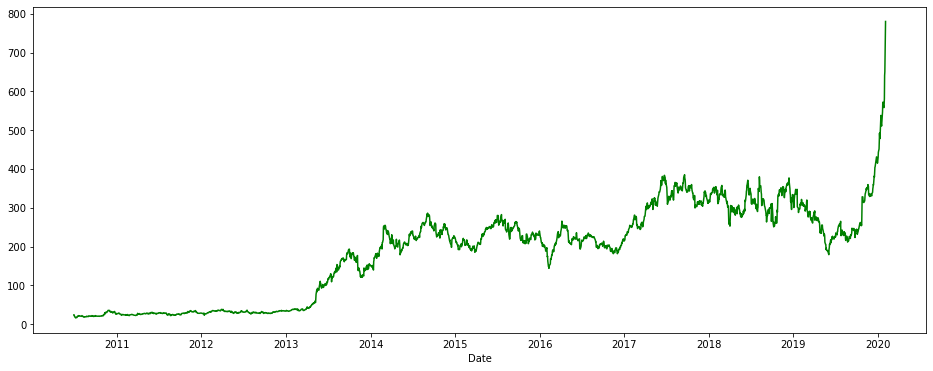

In [10]:
#plot  stock data by line Graph
df['Close'].plot(figsize=(16,6), color='g')

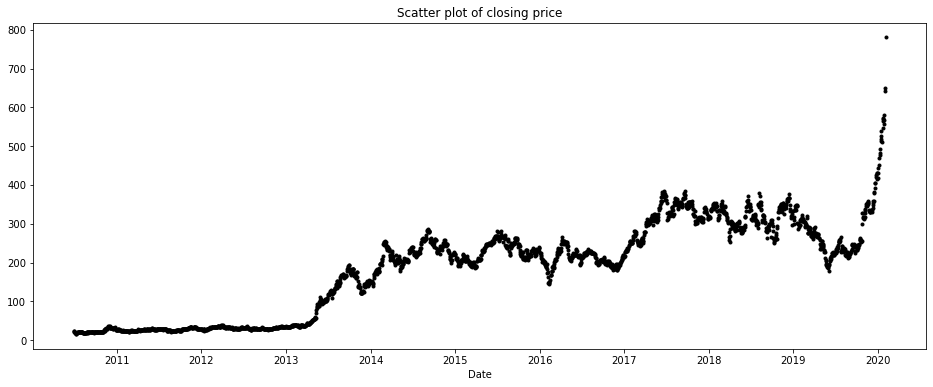

In [18]:
df_close = df['Close']
plt.figure(figsize=(16,6))
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In [20]:
# create new colume of price differnce
df['Price_Diff'] = df['Close'].shift(-1)-df['Close']
df.head()

,Open,High,Low,Close,Adj_Close,Volume,Price_Diff
Date,,,,,,,
2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300,-0.06
2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100,-1.87
2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800,-2.76
2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800,-3.09
2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900,-0.31


In [21]:
# create new colume for daily return
df['Daily_Return'] = df['Price_Diff']/df['Close']
df.head()

,Open,High,Low,Close,Adj_Close,Volume,Price_Diff,Daily_Return
Date,,,,,,,,
2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300,-0.06,-0.002512
2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100,-1.87,-0.078473
2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800,-2.76,-0.125683
2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800,-3.09,-0.160938
2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900,-0.31,-0.019243


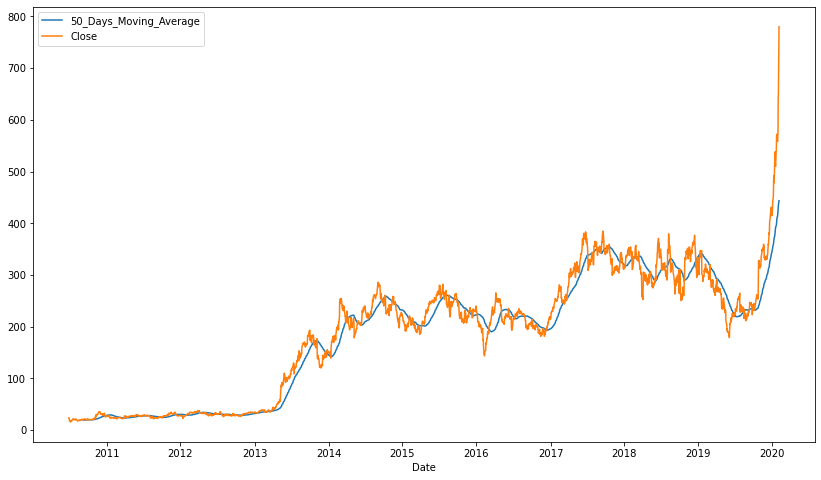

In [27]:
#here we apply rolling widow calculation for 50 days 
df['50_Days_Moving_Average'] = df['Close'].rolling(50).mean()
df['50_Days_Moving_Average'].plot(figsize=(14,8))
df['Close'].plot()
plt.legend()
plt.show()

In [28]:
df['50_Days_Moving_Average']=df['Close'].rolling(50).mean()
df['10_Days_Moving_Average']=df['Close'].rolling(10).mean()

In [29]:
df=df.dropna()
df.head()

,Open,High,Low,Close,Adj_Close,Volume,Price_Diff,Daily_Return,50_Days_Moving_Average,10_Days_Moving_Average
Date,,,,,,,,,,
2010-09-08,20.66,20.95,20.60,20.90,20.90,288400,-0.19,-0.009091,19.8336,20.270
2010-09-09,21.00,21.05,20.69,20.71,20.71,376200,-0.54,-0.026074,19.7700,20.351
2010-09-10,20.75,20.93,19.76,20.17,20.17,386600,0.55,0.027268,19.6968,20.393
2010-09-13,20.89,20.90,20.50,20.72,20.72,360800,0.40,0.019305,19.6720,20.495
2010-09-14,20.54,21.60,20.53,21.12,21.12,654700,0.86,0.040720,19.7104,20.620


In [33]:
df['shares'] = [1 if df.loc[ei, '10_Days_Moving_Average']>df.loc[ei, '50_Days_Moving_Average'] else 0 for ei in df.index]

<Figure size 1152x432 with 0 Axes>

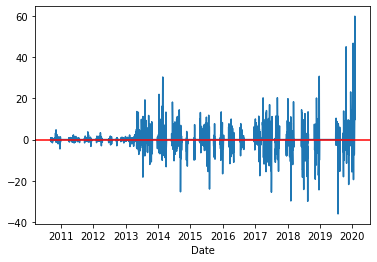

<Figure size 1152x432 with 0 Axes>

In [36]:
#calculate profit and plot it
df['Close1'] = df['Close'].shift(-1)
df['Profit'] = [df.loc[ei, 'Close1'] - df.loc[ei, 'Close'] if df.loc[ei, 'shares']==1 else 0 for ei in df.index]
df['Profit'].plot()
plt.axhline(y=0, color='red')
# make fig size bigger
plt.figure(figsize=(16,6))


In [37]:
df['log_return']=np.log(df['Close'].shift(-1))-np.log(df['Close'])
df['log_return']

Date
2010-09-08   -0.009132
2010-09-09   -0.026420
2010-09-10    0.026903
2010-09-13    0.019121
2010-09-14    0.039912
                ...   
2020-01-27    0.015788
2020-01-28    0.024551
2020-01-29    0.097999
2020-01-30    0.015116
2020-01-31         NaN
Name: log_return, Length: 2366, dtype: float64

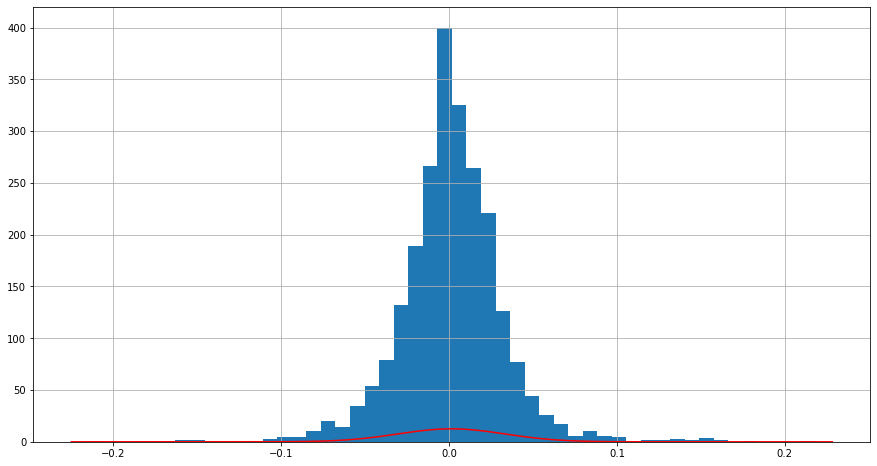

In [38]:
from scipy.stats import norm
mu = df['log_return'].mean()
sigma = df['log_return'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(df['log_return'].min()-0.01, df['log_return'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

df['log_return'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [39]:
prob_return1 = norm.cdf(-0.10, mu, sigma)
print('The probability of dropping over 10% in one day ', prob_return1)

The probability of dropping over 10% in one day  0.0007272322188150337


In [40]:
mu220 = 365*mu
sigma220 = (365**0.5) * sigma
drop20 = None
print('The probability of dropping over 25% over a year: ', drop20)

The probability of dropping over 25% over a year:  None


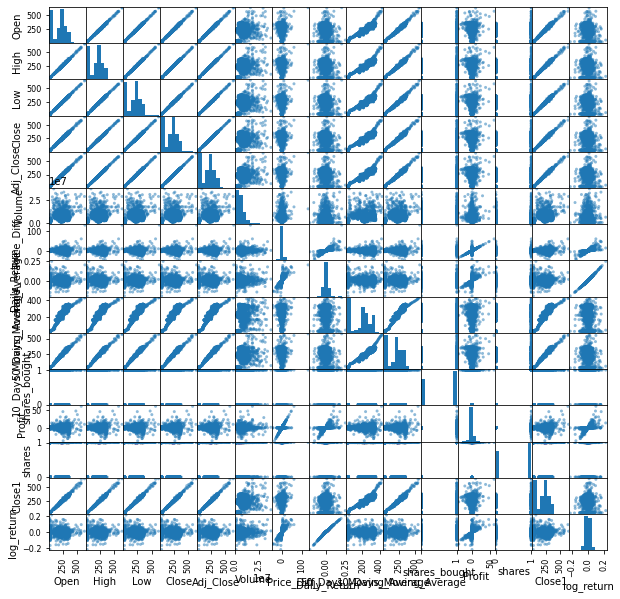

In [43]:

from pandas.plotting import scatter_matrix
sm = scatter_matrix(df, figsize=(10, 10))
